### Exercise 04.1

In questo esercizio ho a disposizione un codice che esegue una simulazione di dinamica molecolare, ossia a partire da una certa configurazione iniziale in cui sono disposte le molecole (o atomi) fa evolvere il sistema con possibilità di salvare la configurazione finale delle stesse. 
Esso genera le velocità iniziali delle molecole in modo che siano distribuite secondo una distribuzione Maxwell-Boltzmann e in modo che la temperatura complessiva del sistema sia quella desiderata, letta da file di input.  
Ho aggiunto al codice la possibilità di memorizzare oltre alla configurazione finale, anche quella immediatamente precedente. In particolare, ho aggiunto una variabile *restart* il cui valore (0 o 1) viene letto da file di input: quando questa vale 0, il codice legge solo la configurazione iniziale e termina ricordando anche la precedente. Per raggiungere questo scopo ho aggiunto alla funzione già presente *ConfFinal* la possibilità di stampare sul file di output *config.pre* la penultima configurazione.  
Da'altro canto quando la variabile *restart* vale 1 il codice legge le configurazioni *r = r(t)* e *$r_{old} = r(t-dt)$* dai rispettivi files e genera le velocità nel seguente modo:  
- eseguo un passo del Verlet (*Move*), quindi *$r(t)=r_{old}$* e *$r(t+dt)=r$*  
- calcolo $v^2$ come: $(v(\frac{dt}{2}))^2=(\frac{r(t+dt)-r(t)}{dt})^2$
- calcolo la temperatura attuale $T=\frac{(v(\frac{dt}{2}))^2}{3}$
- calcolo il fattore di scala come $fs=\frac{T}{temp}$ (dove *temp* indica la temperatura a cui si desidera lavorare)
- riscalo le velocità del fattore fs
- ne vengono fissate delle nuove *$r_{old}=r(t+dt)-vdt$* 

Tutte queste operazioni vengono svolte nella funzione *Input*.

### Exercise 04.2

Ho aggiunto al codice la possibilità di calcolare alcune proprietà medie del sistema con la loro incertezza statistica (in particolare $E/N$, energia totale per particella, $U/N$ potenziale p.p., $K/N$ energia cinetica p.p e $T$ temperatura), utilizzando il metodo della media a blocchi. Per farlo ho implementato la funzione *Accumula* che viene chiamata ogni qualvolta viene chiamata la funzione *Measure* e che somma nei corretti accumulatori i valori istantanei delle grandezze misurate. Ho poi implementato la funzione *Blocco*, che accumula la media del blocco e il suo quadrato e usa queste quantità per stampare su file di output la media del blocco attuale e l'incertezza statistica corrispondente.
Quindi, anche in questo caso per il calocolo statistico delle incertezze e dei valori medi ho utilizzato il data-blocking. Questo perchè in una simulazione di dinamica molecolare il tempo tra due punti successivi della simulazione è di solito troppo breve per ottenere un campionamento statistico indipendente, cioè tali punti in genere sono fortemente correlati. Il raggruppamento dei dati in blocchi determina l'eliminazione di tale correlazione e quindi l'applicabilità del Teorema del Limite Centrale (variabili indipendenti), così da permettere la stima statistica delle grandezze.

### Exercise 04.3

Ho  aggiunto i parametri necessari per specializzare il codice sull'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), impostando l'interazione mutua tra le particelle di tipo Lennard-Jones, nelle tre fasi:
1. solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


Prima di eseguire la vera e propria simulazione è necessario effettuare **l'equilibrazione** del sistema.
Per equilibrazione intendo risolvere le equazioni del moto per il sistema (via metodo numerico: algoritmo di Verlet) fino a che le proprietà termodinamiche rimangono costanti nel tempo.
Tale fase è fondamentale perchè l'algoritmo di Verlet lavora a energia costante, mentre io desidero simulare una precisa fase e lavorare a temperatura costante. 
Dunque, per realizzare l'equilibrazione imposto la variabile *restart* = 0 e scelgo un piccolo numero di passi (5000 steps totali), per evitare che essa sia eccessivamente lunga. Poi modifico *restart*  = 1 e eseguo il codice fino a che la temperatura non è quella desiderata, ossia $T^\star$.
Nei seguenti grafici mostro l'equilibrazione per l'Argon nella fase solida, liquida e gassosa.

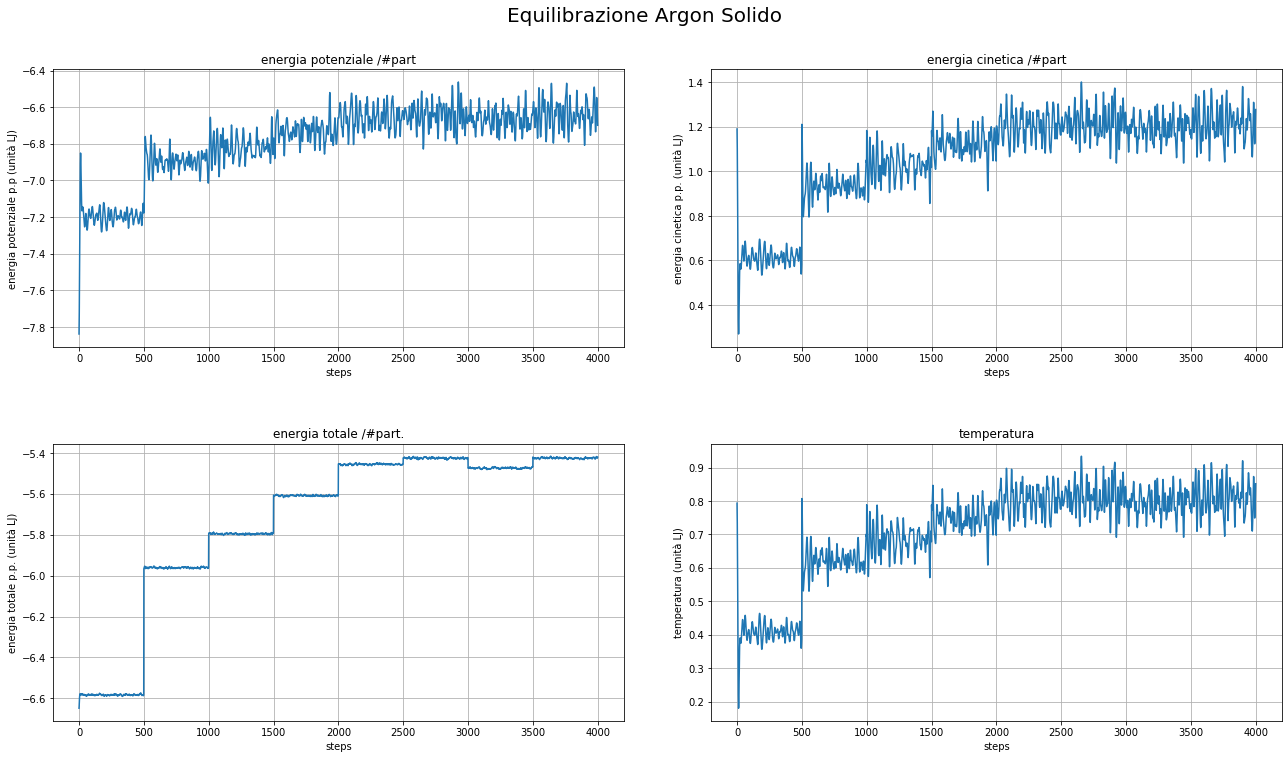

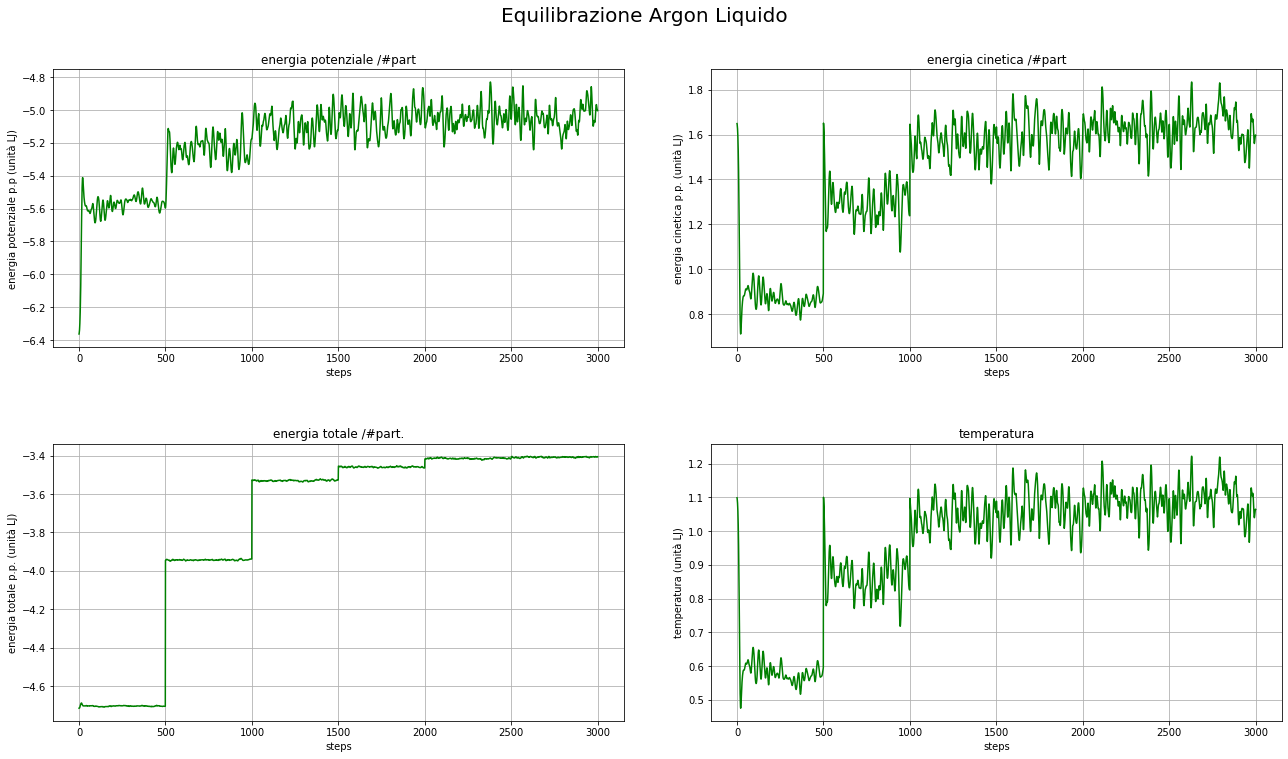

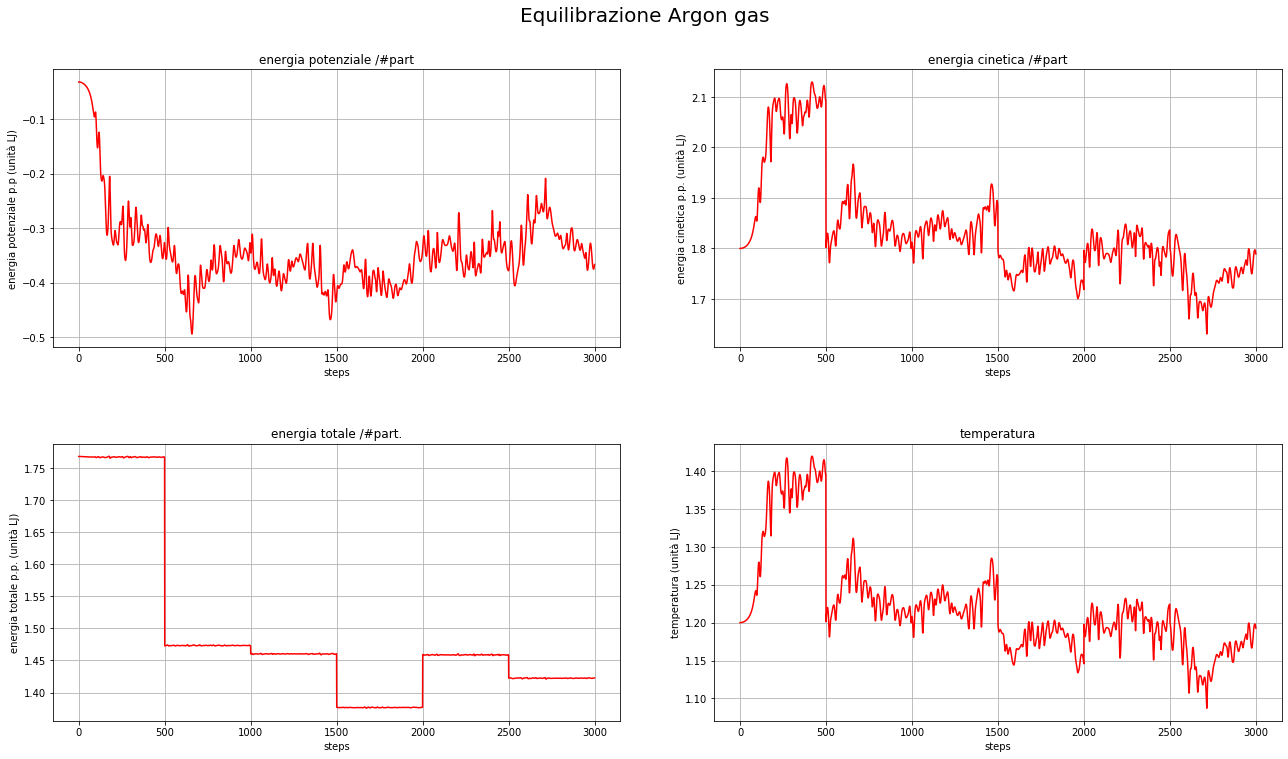

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,10))
plt.suptitle("Equilibrazione Argon Solido", fontsize=20, y=1.05)

plt.subplot(2,2,1)
r= np.loadtxt("./MolecularDynamics_NVE/solido.eq/output_epot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r)
plt.xlabel('steps(1/10)')
plt.ylabel('energia potenziale p.p (unità LJ)')
plt.title('energia potenziale /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,2)
r= np.loadtxt("./MolecularDynamics_NVE/solido.eq/output_ekin.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r)
plt.xlabel('steps(1/10)')
plt.ylabel('energia cinetica p.p. (unità LJ)')
plt.title('energia cinetica /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,3)
r = np.loadtxt("./MolecularDynamics_NVE/solido.eq/output_etot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r)
plt.xlabel('steps(1/10)')
plt.ylabel('energia totale p.p. (unità LJ)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,4)
r = np.loadtxt("./MolecularDynamics_NVE/solido.eq/output_temp.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r)
plt.xlabel('steps(1/10)')
plt.ylabel('temperatura (unità LJ)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

#*************************************************************************************************

plt.figure(figsize=(18,10))
plt.suptitle("Equilibrazione Argon Liquido", fontsize=20, y=1.05)

plt.subplot(2,2,1)
r= np.loadtxt("./MolecularDynamics_NVE/liquido.eq/output_epot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'g')
plt.xlabel('steps(1/10)')
plt.ylabel('energia potenziale p.p (unità LJ)')
plt.title('energia potenziale /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,2)
r= np.loadtxt("./MolecularDynamics_NVE/liquido.eq/output_ekin.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'g')
plt.xlabel('steps(1/10)')
plt.ylabel('energia cinetica p.p. (unità LJ)')
plt.title('energia cinetica /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,3)
r = np.loadtxt("./MolecularDynamics_NVE/liquido.eq/output_etot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'g')
plt.xlabel('steps(1/10)')
plt.ylabel('energia totale p.p. (unità LJ)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,4)
r = np.loadtxt("./MolecularDynamics_NVE/liquido.eq/output_temp.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'g')
plt.xlabel('steps(1/10)')
plt.ylabel('temperatura (unità LJ)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

#***************************************************************************************************
plt.figure(figsize=(18,10))
plt.suptitle("Equilibrazione Argon gas", fontsize=20, y=1.05)

plt.subplot(2,2,1)
r= np.loadtxt("./MolecularDynamics_NVE/gas.eq/output_epot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'r')
plt.xlabel('steps(1/10)')
plt.ylabel('energia potenziale p.p (unità LJ)')
plt.title('energia potenziale /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,2)
r= np.loadtxt("./MolecularDynamics_NVE/gas.eq/output_ekin.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'r')
plt.xlabel('steps(1/10)')
plt.ylabel('energia cinetica p.p. (unità LJ)')
plt.title('energia cinetica /#part')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,3)
r = np.loadtxt("./MolecularDynamics_NVE/gas.eq/output_etot.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'r')
plt.xlabel('steps(1/10)')
plt.ylabel('energia totale p.p. (unità LJ)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(2,2,4)
r = np.loadtxt("./MolecularDynamics_NVE/gas.eq/output_temp.dat", usecols=(0), unpack=True)
n_b = np.arange(r.size)
plt.plot(n_b,r, 'r')
plt.xlabel('steps(1/10)')
plt.ylabel('temperatura (unità LJ)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

plt.show()

Nei grafici riporto il valore delle grandezze termodinamiche richieste in unità L.J., in funzione di nsteps/10. Infatti nell'algoritmo ho registrato il loro valore istantaneo ogni 10 passi del meotodo Verlet, così da scongiurare ogni tipo di correlazione tra i dati prodotti.
In tutte e tre le fasi partendo da una configurazione FCC (descritta nel file *config.0*) a bassissima energia potenziale, non appena inizia la simulazione osservo che l'energia potenziale aumenta molto, mentre la cinetica e la temperatura (che sono fra loro proporzionali) diminuiscono; tramite la riesecuzione del codice con *restar*  = 1 si riporta la temperatura al valore desiderato $T^\star$.  
Noto che la fase solida tra le tre è quella che presenta un minor tempo di equilibrazione. Inoltre l'energia totale rimane approssimativamente costante e non mostra un drift durante le varie simulazioni di equilibrazione. 
Infine registro come tramite il processo di equilibrazione la temperatura raggiunge il valore desiderato.  

Una volta che ho equilibrato il sistema eseguo la vera e propria **simulazione**. Mantengo *restart*  = 1 in modo tale che la simulazione inizia dalle ultime due configurazioni degli atomi registrate nella fase di equilibrazione.
Utilizzo 50000 nsteps divisi in 50 blocchi, riportando medie ed errori ottenuti con data-blocking come precedentemente illustrato. Qui di seguito sono riportati i grafici ottenuti per le tre fasi nel caso dell'Argon.

Dopo la simulazione moltiplico le quantità termodinamiche rischieste per i corretti fattori per passare da unità di Lennard-Jones a unità del SI. 
Aggiungo che svolgendo questo esercizio ho apprezzato la grande utilità delle unità ridotte: il codice è adatto a simulare sistemi molto diversi tra loro, modificando in modo molto semplice due soli parametri ($\sigma$ ed $\epsilon/k_B$) ed è così molto versatile.

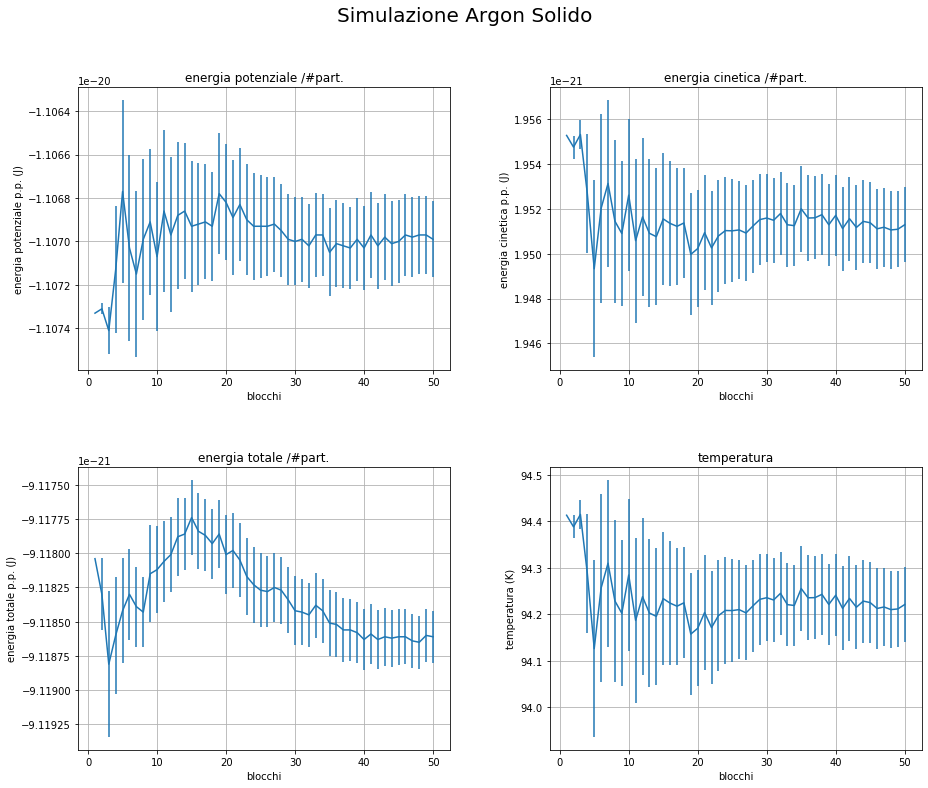

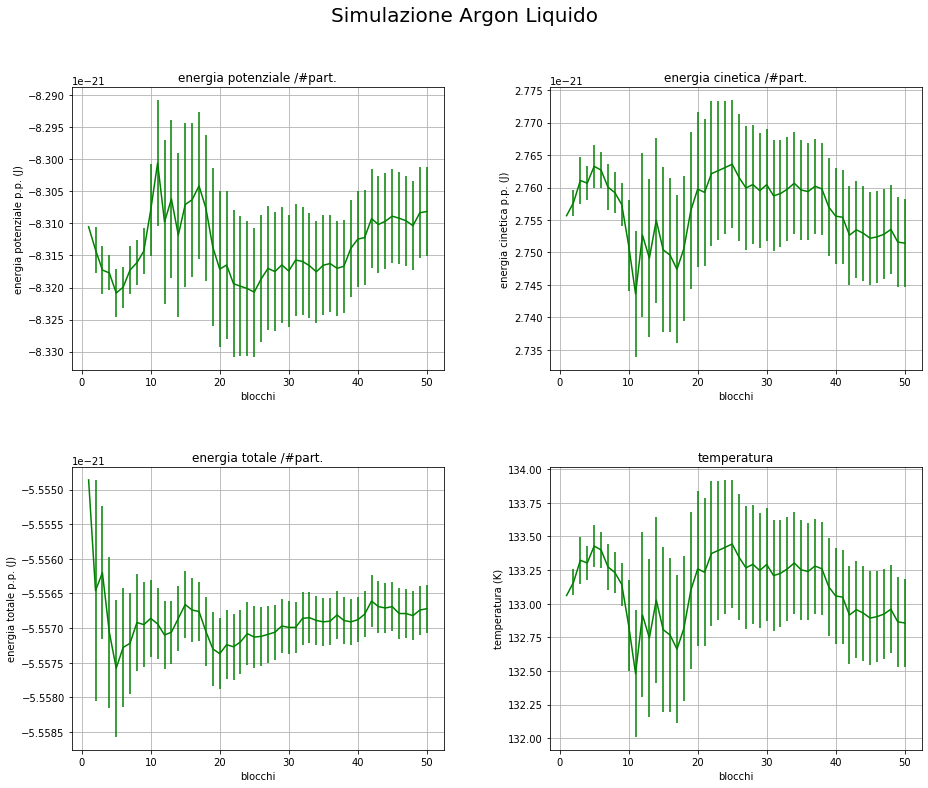

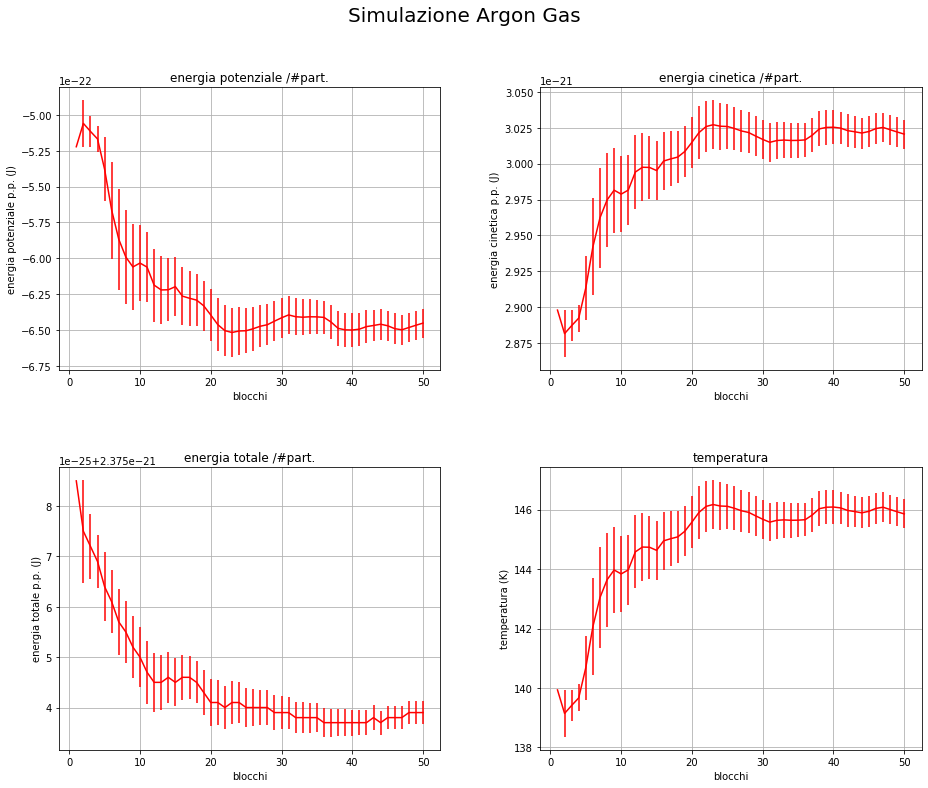

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13,15))

plt.suptitle("Simulazione Argon Solido", fontsize=20, y=1.05)

plt.subplot(3,2,1)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/solido.sim/ave_epot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale p.p. (J)')
plt.title('energia potenziale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

plt.subplot(3,2,2)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/solido.sim/ave_ekin.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica p.p. (J)')
plt.title('energia cinetica /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,3)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/solido.sim/ave_etot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale p.p. (J)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,4)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/solido.sim/ave_temp.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

#*****************************************************************************************************

plt.figure(figsize=(13,15))

plt.suptitle("Simulazione Argon Liquido", fontsize=20, y=1.05)

plt.subplot(3,2,1)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/liquido.sim/ave_epot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='g')
plt.xlabel('blocchi')
plt.ylabel('energia potenziale p.p. (J)')
plt.title('energia potenziale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

plt.subplot(3,2,2)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/liquido.sim/ave_ekin.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='g')
plt.xlabel('blocchi')
plt.ylabel('energia cinetica p.p. (J)')
plt.title('energia cinetica /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,3)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/liquido.sim/ave_etot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='g')
plt.xlabel('blocchi')
plt.ylabel('energia totale p.p. (J)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,4)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/liquido.sim/ave_temp.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='g')
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

#****************************************************************************************************
plt.figure(figsize=(13,15))

plt.suptitle("Simulazione Argon Gas", fontsize=20, y=1.05)

plt.subplot(3,2,1)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/gas.sim/ave_epot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='r')
plt.xlabel('blocchi')
plt.ylabel('energia potenziale p.p. (J)')
plt.title('energia potenziale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

plt.subplot(3,2,2)
n_b, r, error = np.loadtxt("./MolecularDynamics_NVE/gas.sim/ave_ekin.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='r')
plt.xlabel('blocchi')
plt.ylabel('energia cinetica p.p. (J)')
plt.title('energia cinetica /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,3)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/gas.sim/ave_etot.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='r')
plt.xlabel('blocchi')
plt.ylabel('energia totale p.p. (J)')
plt.title('energia totale /#part.')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)


plt.subplot(3,2,4)
n_b,r, error = np.loadtxt("./MolecularDynamics_NVE/gas.sim/ave_temp.out", usecols=(0,1,2), unpack=True)
plt.errorbar(n_b,r,yerr=error, color='r')
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')
plt.grid()
plt.tight_layout(w_pad=5, h_pad=5)

plt.show()